# Kanji2Kanji

Reproduce domain transfer results in [Deep Learning for Classical Japanese Literature](https://arxiv.org/abs/1812.01718)

## Notebook to Demo Trained Models

Run this notebook load the models after training


In [1]:
# imports

from kanji2kanji import *

The next cell trains a VAE on Kuzushiji Kanji

In [2]:
# loads the data we need
kanji_set, new_kanji = load_kanji_rnn_test_data()

INFO:tensorflow:Model using cpu.
loading model vae_old/vae-0
INFO:tensorflow:Loading model vae_old/vae-0.
INFO:tensorflow:Restoring parameters from vae_old/vae-0
INFO:tensorflow:Model using cpu.
loading model vae_new/vae-0
INFO:tensorflow:Loading model vae_new/vae-0.
INFO:tensorflow:Restoring parameters from vae_new/vae-0
total drawings <= max_seq_len is 1828


In [3]:
# loads trained models

reset_graph()

# loads domain transfer model
translate_model = Latent2Latent(batch_size=1, gpu_mode=False, is_training=False)
translate_model.load_checkpoint("image2image")

# loads VAE trained on Kuzushiji
vae_old = ConvVAE(z_size=Z_SIZE, batch_size=1, gpu_mode=False, is_training=False, reuse=True)
vae_old.load_checkpoint("vae_old")

# loads VAE trained on modern kanji
vae_new = ConvVAE(z_size=Z_SIZE, batch_size=1, gpu_mode=False, is_training=False, reuse=True)
vae_new.load_checkpoint("vae_new")

# load sketch-rnn model
hps_train, hps_test, hps_sample = get_default_hparams()
sample_model = MDNRNN(hps_sample, gpu_mode=False, layer_norm=True)
sample_model.load_checkpoint("kanji_rnn")

INFO:tensorflow:Model using cpu.
loading model image2image/image2image-0
INFO:tensorflow:Loading model image2image/image2image-0.
INFO:tensorflow:Restoring parameters from image2image/image2image-0
INFO:tensorflow:Model using cpu.
loading model vae_old/vae-0
INFO:tensorflow:Loading model vae_old/vae-0.
INFO:tensorflow:Restoring parameters from vae_old/vae-0
INFO:tensorflow:Model using cpu.
loading model vae_new/vae-0
INFO:tensorflow:Loading model vae_new/vae-0.
INFO:tensorflow:Restoring parameters from vae_new/vae-0
model using cpu
layer norm mode = False
layers = 3
input dropout mode = False
output dropout mode = False
recurrent dropout mode = False
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

loading model kanji_rnn/sketchrnn-0
INFO:tensorflow:Loading model kanji_rnn/sketchrnn-0.
INFO:tensorflow:Restoring parameters from kanji_rnn/sketchrn

Unicode 恐
Stroke (Answer)


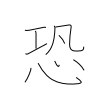

Kuzushiji


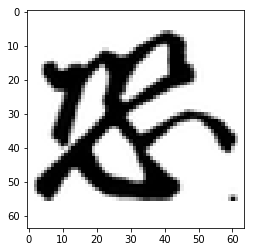

Kuzushiji Reconstruction


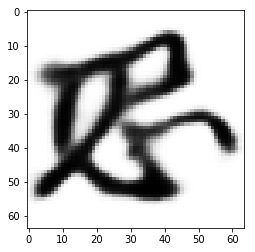

Modern Kanji


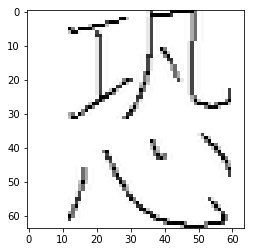

Modern Kanji Reconstruction


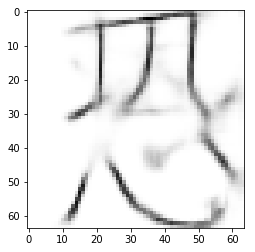

Reconstruction of Predicted Latent Code


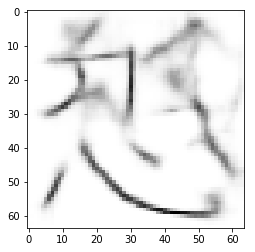

Sample Prediction #0:


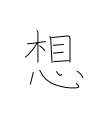

Sample Prediction #1:


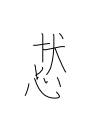

Sample Prediction #2:


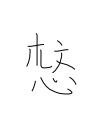

Sample Prediction #3:


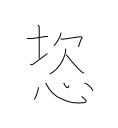

Sample Prediction #4:


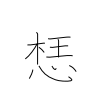

Sample Prediction #5:


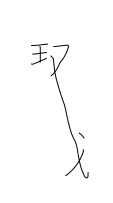

Sample Prediction #6:


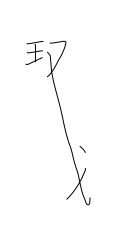

Sample Prediction #7:


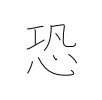

Sample Prediction #8:


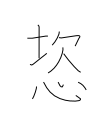

Sample Prediction #9:


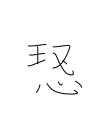

In [4]:
# select a random Kanji in the test set and look at the result:
dump_result(np.random.randint(kanji_set.num_batches), kanji_set, new_kanji, translate_model, vae_old, vae_new, sample_model, display_mode=True)